### Exploration
In this exercise you will kick off your journey to become an ARIMA master by loading and plotting a time series. You probably do this all the time, but this is just a refresher.

You will be exploring a dataset of monthly US candy production between 1972 and 2018.

Specifically, you are plotting the industrial production index IPG3113N. This is total amount of sugar and confectionery products produced in the USA per month, as a percentage of the January 2012 production. So 120 would be 120% of the January 2012 industrial production.

Check out how this quantity has changed over time and how it changes throughout the year.

In [9]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt

# Load in the time series
candy = pd.read_csv('candy_production.csv', index_col='date', parse_dates=True)
candy.head()


,IPG3113N
date,
1972-01-01,85.598809
1972-02-01,71.741404
1972-03-01,65.948809
1972-04-01,64.490724
1972-05-01,64.933842


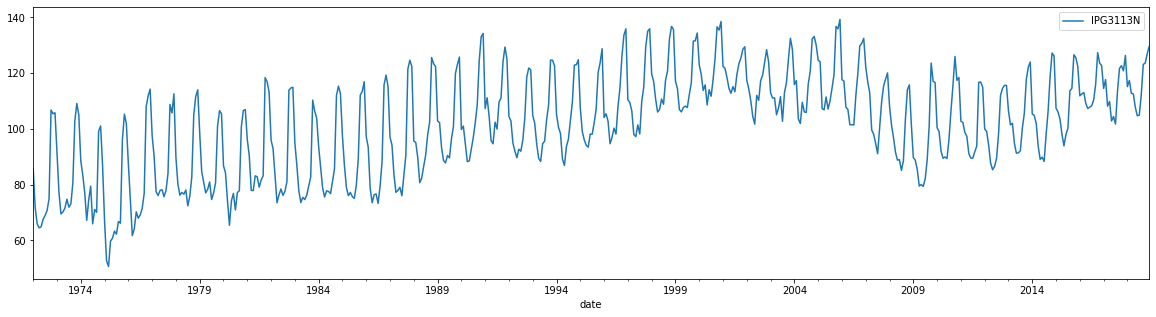

In [11]:
# Plot and show the time series on axis ax

fig, ax = plt.subplots(figsize=(20, 5))
#ig, ax = plt.subplots(figsize=(20, 10))

candy.plot(ax=ax)
plt.show()

### Train-test splits
In this exercise you are going to take the candy production dataset and split it into a train and a test set. Like you understood in the video exercise, the reason to do this is so that you can test the quality of your model fit when you are done.

The candy production data set has been loaded in for you as candy already and pyplot has been loaded in as plt.

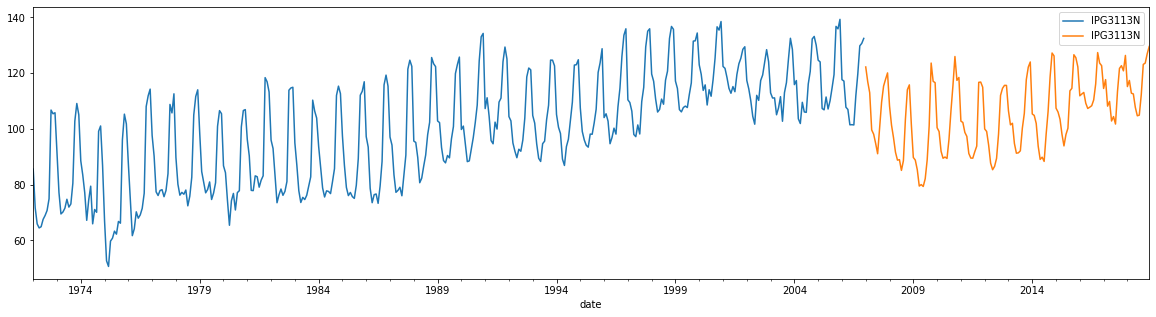

In [13]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

# Create an axis
fig, ax = plt.subplots(figsize = (20, 5))

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show()

### Is it stationary
Identifying whether a time series is stationary or non-stationary is very important. If it is stationary you can use ARMA models to predict the next values of the time series. If it is non-stationary then you cannot use ARMA models, however, as you will see in the next lesson, you can often transform non-stationary time series to stationary ones.

In this exercise you will examine some stock and earthquake data sets in order to identify which are ready for ARMA modeling, and which will need further work to make them stationary.

In [15]:
AMZ = pd.read_csv('amazon_close.csv', index_col='date', parse_dates=True)
AMZ.head()

,close
date,
2019-02-08,1588.22
2019-02-07,1614.37
2019-02-06,1640.26
2019-02-05,1658.81
2019-02-04,1633.31


### The AMZ stock price is not stationary

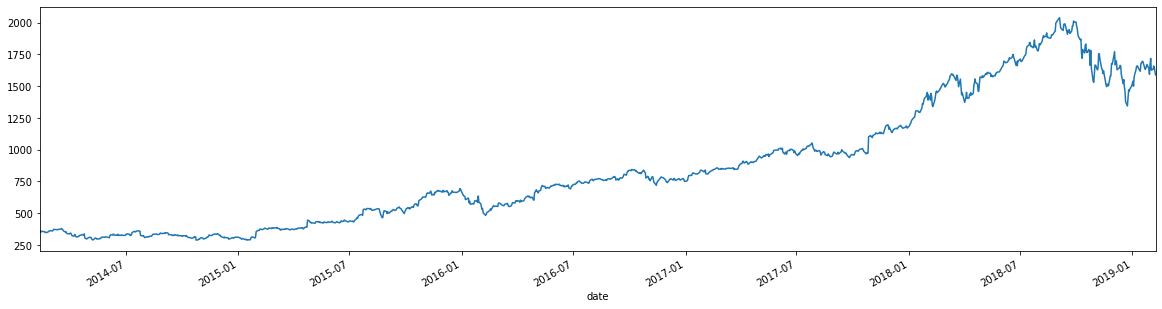

In [18]:
# Create an axis
fig, ax = plt.subplots(figsize = (20, 5))

# Plot the train and test sets on the axis ax
AMZ['close'].plot(ax=ax)

plt.show()

### Percentage change of the stock is not stationary

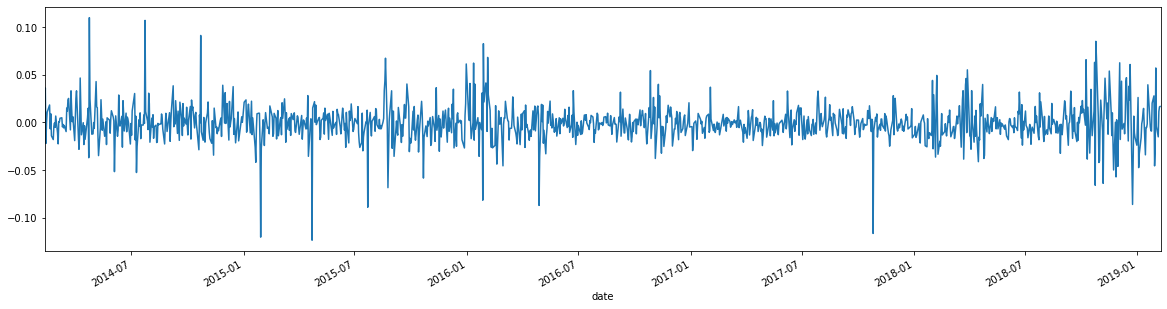

In [16]:
pct_change = AMZ['close'].pct_change()
# Create an axis
fig, ax = plt.subplots(figsize = (20, 5))

# Plot the train and test sets on the axis ax
pct_change.plot(ax=ax)

plt.show()

### Earthquakes timeseries is stationary

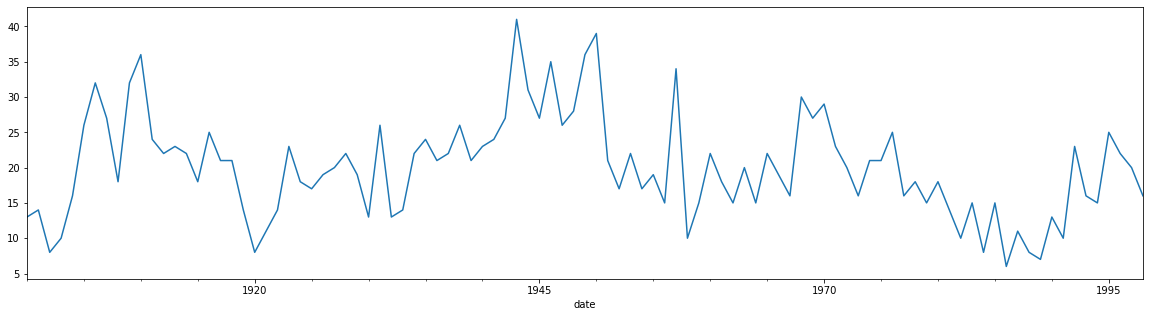

In [20]:
earth = pd.read_csv('earthquakes.csv', index_col='date', parse_dates=True)
fig, ax = plt.subplots(figsize = (20, 5))

# Plot the train and test sets on the axis ax
earth['earthquakes_per_year'].plot(ax=ax)

plt.show()

### How to make time series stationary

### Augmented Dicky-Fuller
In this exercise you will run the augmented Dicky-Fuller test on the earthquakes time series to test for stationarity. You plotted this time series in the last exercise. It looked like it could be stationary, but earthquakes are very damaging. If you want to make predictions about them you better be sure.

Remember that if it were not stationary this would mean that the number of earthquakes per year has a trend and is changing. This would be terrible news if it is trending upwards, as it means more damage. It would also be terrible news if it were trending downwards, it might suggest the core of our planet is changing and this could have lots of knock on effects for us!

The earthquakes DataFrame has been loaded in for you as earthquake.

In [21]:
# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

# Run test
result = adfuller(earth['earthquakes_per_year'])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

-3.1831922511917816
0.020978425256003668
{'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}


### Taking the difference
In this exercise, you will to prepare a time series of the population of a city for modeling. If you could predict the growth rate of a city then it would be possible to plan and build the infrastructure that the city will need later, thus future-proofing public spending. In this case the time series is fictitious but its perfect to practice on.

You will test for stationarity by eye and use the Augmented Dicky-Fuller test, and take the difference to make the dataset stationary.

The DataFrame of the time series has been loaded in for you as city and the adfuller() function has been imported.

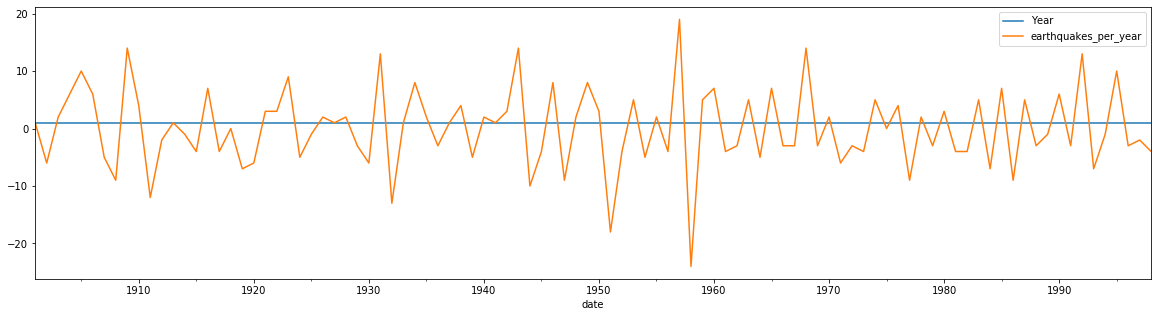

ADF Statistic: -10.827211879809573
p-value: 1.7445517772027123e-19


In [23]:
# Calculate the first difference of the time series
earth_stationary = earth.diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(earth_stationary['earthquakes_per_year'])

# Plot the differenced time series
fig, ax = plt.subplots(figsize = (20, 5))
earth_stationary.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

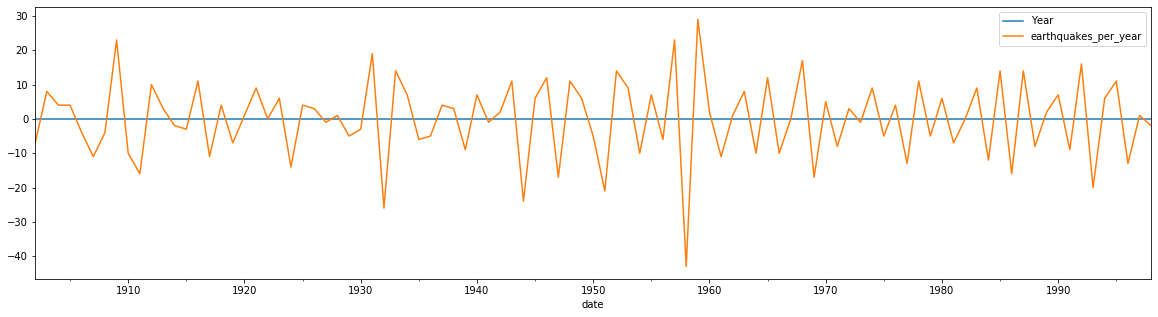

ADF Statistic: -6.73394658235724
p-value: 3.243048512656498e-09


In [26]:
# Calculate the second difference of the time series
earth_stationary = earth.diff().diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(earth_stationary['earthquakes_per_year'])

# Plot the differenced time series
fig, ax = plt.subplots(figsize = (20, 5))
earth_stationary.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

### Other tranforms
Differencing should be the first transform you try to make a time series stationary. But sometimes it isn't the best option.

A classic way of transforming stock time series is the log-return of the series. This is calculated as follows:
log_return(yt)=log(ytyt−1)
The Amazon stock time series has already been loaded for you as amazon. You can calculate the log-return of this DataFrame by substituting:

yt→ amazon
yt−1→ amazon.shift(1)
log()→ np.log()
In this exercise you will compare the log-return transform and the first order difference of the Amazon stock time series to find which is better for making the time series stationary.

In [31]:
import numpy as np
# Calculate the first difference and drop the nans
amazon_diff = AMZ.diff()
amazon_diff = amazon_diff.dropna()

# Run test and print
result_diff = adfuller(amazon_diff['close'])
print(result_diff)

print('---------------------- After log transformations -------------')
# Calculate log-return and drop nans
amazon_log = np.log(AMZ/AMZ.shift(1))
amazon_log = amazon_log.dropna()

# Run test and print
result_log = adfuller(amazon_log['close'])
print(result_log)

(-7.203579488811219, 2.3312717254875353e-10, 23, 1234, {'1%': -3.435660336370594, '5%': -2.863885022214541, '10%': -2.568018522153254}, 10764.626718933836)
---------------------- After log transformations -------------
(-34.915748536059674, 0.0, 0, 1257, {'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}, -6245.723147672197)


### Model order
When fitting and working with AR, MA and ARMA models it is very important to understand the model order. You will need to pick the model order when fitting. Picking this correctly will give you a better fitting model which makes better predictions. So in this section you will practice working with model order.

### Generating ARMA data
In this exercise you will generate 100 days worth of AR/MA/ARMA data. Remember that in the real world applications, this data could be changes in Google stock prices, the energy requirements of New York City, or the number of cases of flu.

You can use the arma_generate_sample() function available in your workspace to generate time series using different AR and MA coefficients.

Remember for any model ARMA(p,q):

The list ar_coefs has the form [1, -a_1, -a_2, ..., -a_p].
The list ma_coefs has the form [1, m_1, m_2, ..., m_q],
where a_i are the lag-i AR coefficients and m_j are the lag-j MA coefficients.

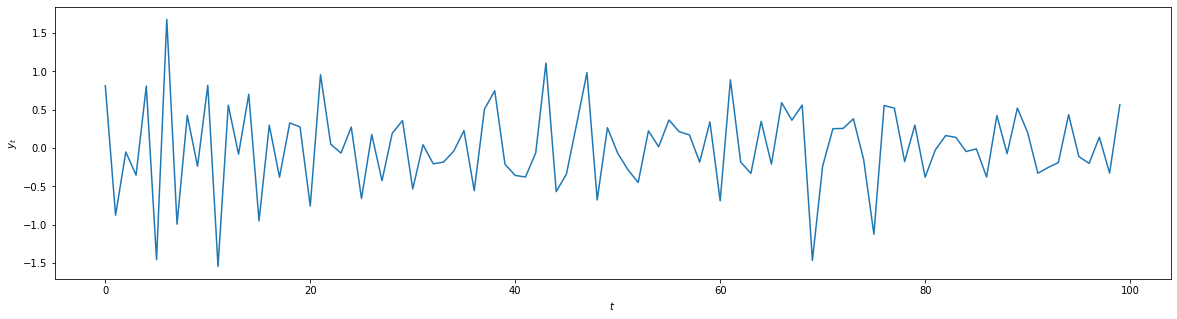

In [33]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(1)

# Set coefficients
ar_coefs = [1]
ma_coefs = [1, -0.7]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, sigma=0.5)

plt.figure(figsize= (20,5))
plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()


### Fitting Prelude
Great, you understand model order! Understanding the order is important when it comes to fitting models. You will always need to select the order of model you fit to your data, no matter what that data is.

In this exercise you will do some basic fitting. Fitting models is the next key step towards making predictions. We'll go into this more in the next chapter but let's get a head start.

Some example ARMA(1,1) data have been created and are available in your environment as y. This data could represent the amount of traffic congestion. You could use forecasts of this to suggest the efficient routes for drivers.

In [35]:
# Import the ARMA model
from statsmodels.tsa.arima_model import ARMA

# Instantiate the model
model = ARMA(y, order=(1,1))

# Fit the model
results = model.fit()

# Print summary
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(1, 1)   Log Likelihood                 -60.273
Method:                       css-mle   S.D. of innovations              0.440
Date:                Fri, 07 Aug 2020   AIC                            128.546
Time:                        16:57:47   BIC                            138.967
Sample:                             0   HQIC                           132.763
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093      0.010      0.890      0.375      -0.011       0.030
ar.L1.y        0.0383      0.129      0.298      0.767      -0.214       0.290
ma.L1.y       -0.7808      0.080     -9.743      0.0

### Fitting an ARMA model
In this exercise you will fit an ARMA model to the earthquakes dataset. You saw before that the earthquakes dataset is stationary so you don't need to transform it at all. It comes ready for modeling straight out the ground. You can remind yourself what it looks like below

In [37]:
# Instantiate the model
model = ARMA(earth['earthquakes_per_year'], order=(3,1))

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

/Users/alket/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                               ARMA Model Results                               
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                       ARMA(3, 1)   Log Likelihood                -315.673
Method:                         css-mle   S.D. of innovations              5.853
Date:                  Fri, 07 Aug 2020   AIC                            643.345
Time:                          17:03:00   BIC                            658.916
Sample:                      01-01-1900   HQIC                           649.645
                           - 01-01-1998                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         19.6452      1.929     10.183      0.000      15.864      23.426
ar.L1.earthquakes_per_year     0.5794      0.416      1.393      0.

### Fitting an ARMAX model
In this exercise you will fit an ARMAX model to a time series which represents the wait times at an accident and emergency room for urgent medical care.

The variable you would like to model is the wait times to be seen by a medical professional wait_times_hrs. This may be related to an exogenous variable that you measured nurse_count which is the number of nurses on shift at any given time. These can be seen below.

In [43]:
hospital = pd.read_csv('hospital.csv', index_col='date', parse_dates=True)
hospital.head()

,wait_times_hrs,nurse_count
date,,
2019-03-04 00:00:00,1.747261,1.0
2019-03-04 01:00:00,1.664634,1.0
2019-03-04 02:00:00,1.647047,1.0
2019-03-04 03:00:00,1.619512,1.0
2019-03-04 04:00:00,1.480415,1.0


In [44]:
# Instantiate the model
model = ARMA(hospital['wait_times_hrs'], order=(2,1),  exog=hospital['nurse_count'])

# Fit the model
results = model.fit()


# Print model fit summary
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:         wait_times_hrs   No. Observations:                   60
Model:                     ARMA(2, 1)   Log Likelihood                  -3.803
Method:                       css-mle   S.D. of innovations              0.256
Date:                Fri, 07 Aug 2020   AIC                             19.605
Time:                        17:14:16   BIC                             32.171
Sample:                             0   HQIC                            24.520
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.0204      0.155     13.073      0.000       1.718       2.323
nurse_count             -0.1005      0.023     -4.308      0.000      -0.146      -0.055
ar.L1.wait_t

/Users/alket/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


### Generating one-step-ahead predictions
It is very hard to forecast stock prices. Classic economics actually tells us that this should be impossible because of market clearing.

Your task in this exercise is to attempt the impossible and predict the Amazon stock price anyway.

In this exercise you will generate one-step-ahead predictions for the stock price as well as the uncertainty of these predictions.

A model has already been fitted to the Amazon data for you. The results object from this model is available in your environment as results.

In [50]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Just an ARMA(p,q) model
model = SARIMAX(earth['earthquakes_per_year'], order=(1,0,1))

results = model.fit()# Make in-sample prediction
forecast = results.get_prediction(start=-25)


/Users/alket/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [52]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-30)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

# Print best estimate predictions
print(mean_forecast)

1969-01-01    22.660866
1970-01-01    24.316941
1971-01-01    26.105778
1972-01-01    24.467153
1973-01-01    22.250354
1974-01-01    19.276987
1975-01-01    19.824516
1976-01-01    20.126589
1977-01-01    22.043598
1978-01-01    19.162919
1979-01-01    18.448819
1980-01-01    16.742083
1981-01-01    17.113238
1982-01-01    15.567652
1983-01-01    12.964594
1984-01-01    13.716424
1985-01-01    11.068090
1986-01-01    12.670118
1987-01-01     9.615664
1988-01-01    10.118457
1989-01-01     9.083084
1990-01-01     8.074278
1991-01-01    10.143248
1992-01-01     9.971938
1993-01-01    15.566076
1994-01-01    15.589256
1995-01-01    15.164455
1996-01-01    19.305977
1997-01-01    20.278098
1998-01-01    19.939243
Freq: AS-JAN, dtype: float64


## Plotting one-step-ahead predictions
Now that you have your predictions on the Amazon stock, you should plot these predictions to see how you've done.

You made predictions over the latest 30 days of data available, always forecasting just one day ahead. By evaluating these predictions you can judge how the model performs in making predictions for just the next day, where you don't know the answer.

The lower_limits, upper_limits and amazon DataFrames as well as your mean prediction mean_forecast that you created in the last exercise are available in your environment.

In [57]:
# Just an ARMA(p,q) model
model = SARIMAX(AMZ['close'], order=(1,0,1))

results = model.fit()# Make in-sample prediction
forecast = results.get_prediction(start=-25)

# Generate predictions
one_step_forecast = results.get_prediction(start=-30)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

confidence_intervals = one_step_forecast.conf_int()
confidence_intervals

/Users/alket/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,lower close,upper close
date,,
2014-03-24,315.576856,393.093313
2014-03-21,313.110538,390.626995
2014-03-20,321.563080,399.079537
2014-03-19,329.914751,407.431208
2014-03-18,334.289269,411.805726
2014-03-17,339.795667,417.312124
2014-03-14,336.326116,413.842573
2014-03-13,334.965255,412.481713
2014-03-12,332.760037,410.276494


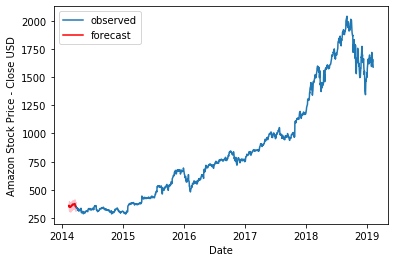

In [60]:
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# plot the amazon data
plt.plot(AMZ.index, AMZ['close'], label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

### Generating dynamic forecasts
Now lets move a little further into the future, to dynamic predictions. What if you wanted to predict the Amazon stock price, not just for tomorrow, but for next week or next month? This is where dynamical predictions come in.

Remember that in the video you learned how it is more difficult to make precise long-term forecasts because the shock terms add up. The further into the future the predictions go, the more uncertain. This is especially true with stock data and so you will likely find that your predictions in this exercise are not as precise as those in the last exercise.

In [61]:
# Generate predictions
dynamic_forecast = results.get_prediction(start=-30, dynamic=True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate predictions
print(mean_forecast)

date
2014-03-24    354.335085
2014-03-21    354.283561
2014-03-20    354.232045
2014-03-19    354.180537
2014-03-18    354.129036
2014-03-17    354.077542
2014-03-14    354.026056
2014-03-13    353.974578
2014-03-12    353.923107
2014-03-11    353.871643
2014-03-10    353.820187
2014-03-07    353.768739
2014-03-06    353.717298
2014-03-05    353.665864
2014-03-04    353.614438
2014-03-03    353.563019
2014-02-28    353.511608
2014-02-27    353.460205
2014-02-26    353.408808
2014-02-25    353.357420
2014-02-24    353.306038
2014-02-21    353.254665
2014-02-20    353.203298
2014-02-19    353.151939
2014-02-18    353.100588
2014-02-14    353.049244
2014-02-13    352.997908
2014-02-12    352.946579
2014-02-11    352.895257
2014-02-10    352.843943
dtype: float64


### Plotting dynamic forecasts
Time to plot your predictions. Remember that making dynamic predictions, means that your model makes predictions with no corrections, unlike the one-step-ahead predictions. This is kind of like making a forecast now for the next 30 days, and then waiting to see what happens before comparing how good your predictions were.

The lower_limits, upper_limits and amazon DataFrames as well as your mean predictions mean_forecast that you created in the last exercise are available in your environment.

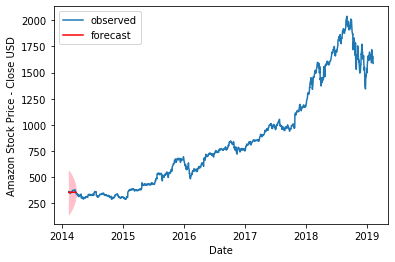

In [63]:
# plot the amazon data
plt.plot(AMZ.index, AMZ['close'], label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

### Differencing and fitting ARMA
In this exercise you will fit an ARMA model to the Amazon stocks dataset. As you saw before, this is a non-stationary dataset. You will use differencing to make it stationary so that you can fit an ARMA model.

In the next section you'll make a forecast of the differences and use this to forecast the actual values.

The Amazon stock time series in available in your environment as amazon. The SARIMAX model class is also available in your environment.

In [64]:
# Take the first difference of the data
amazon_diff = AMZ.diff().dropna()

# Create ARMA(2,2) model
arma = SARIMAX(amazon_diff, order=(2,0,2))

# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())

/Users/alket/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Statespace Model Results                           
Dep. Variable:                  close   No. Observations:                 1258
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -5534.654
Date:                Fri, 07 Aug 2020   AIC                          11079.308
Time:                        17:38:03   BIC                          11104.995
Sample:                             0   HQIC                         11088.962
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1773      0.103     -1.723      0.085      -0.379       0.024
ar.L2          0.7722      0.105      7.352      0.000       0.566       0.978
ma.L1          0.1639      0.098      1.669      0.0

### Unrolling ARMA forecast
Now you will use the model that you trained in the previous exercise arma in order to forecast the absolute value of the Amazon stocks dataset. Remember that sometimes predicting the difference could be enough; will the stocks go up, or down; but sometimes the absolute value is key.

The results object from the model you trained in the last exercise is available in your environment as arma_results. The np.cumsum() function and the original DataFrame amazon are also available.

In [66]:
# Make arma forecast of next 10 differences
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

# Integrate the difference forecast
arma_int_forecast = np.cumsum(arma_diff_forecast)

# Make absolute value forecast
arma_value_forecast = arma_int_forecast + AMZ.iloc[-1,0]

# Print forecast
print(arma_value_forecast)

1258    359.999388
1259    360.587838
1260    359.811248
1261    360.403300
1262    359.698675
1263    360.280753
1264    359.633468
1265    360.197680
1266    359.597839
1267    360.139846
dtype: float64


/Users/alket/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [67]:
AMZ.tail()

,close
date,
2014-02-14,357.35
2014-02-13,357.20
2014-02-12,349.25
2014-02-11,361.79
2014-02-10,360.87


### Fitting an ARIMA model
In this exercise you'll learn how to be lazy in time series modeling. Instead of taking the difference, modeling the difference and then integrating, you're just going to lets statsmodels do the hard work for you.

You'll repeat the same exercise that you did before, of forecasting the absolute values of the Amazon stocks dataset, but this time with an ARIMA model.

A subset of the stocks dataset is available in your environment as amazon and so is the SARIMAX model class.

In [69]:
# Create ARIMA(2,1,2) model
arima = SARIMAX(AMZ, order=(2,1,2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

/Users/alket/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


1259    359.999495
1260    360.588018
1261    359.811455
1262    360.403578
1263    359.698926
1264    360.281084
1265    359.633733
1266    360.198040
1267    359.598103
1268    360.140222
dtype: float64


/Users/alket/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


### AR or MA
In this exercise you will use the ACF and PACF to decide whether some data is best suited to an MA model or an AR model. Remember that selecting the right model order is of great importance to our predictions.

Remember that for different types of models we expect the following behavior in the ACF and PACF:

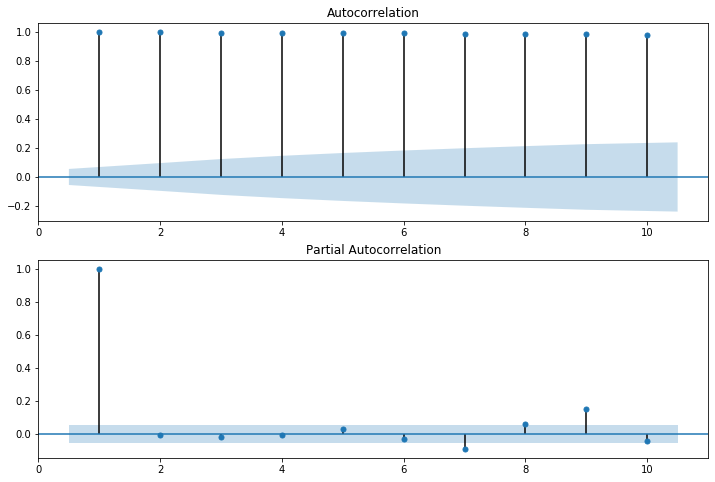

In [73]:
# Import
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of df
plot_acf(AMZ['close'], lags=10, zero=False, ax=ax1)

# Plot the PACF of df
plot_pacf(AMZ['close'], lags=10, zero=False, ax=ax2)

plt.show()

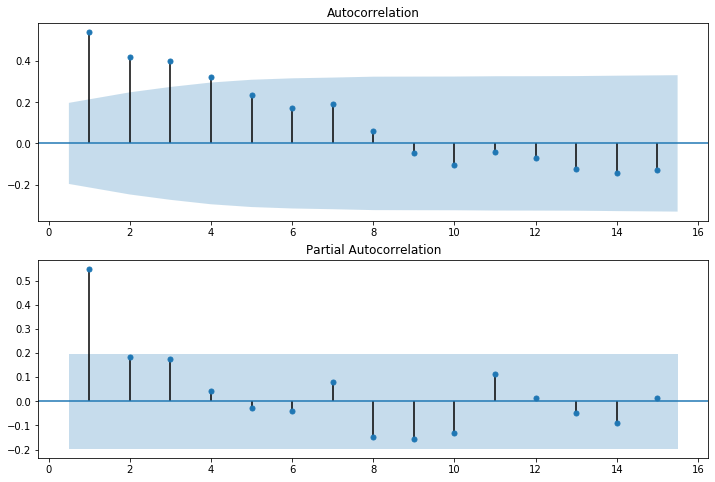

In [75]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(earth['earthquakes_per_year'], lags=15, zero=False, ax=ax1)
plot_pacf(earth['earthquakes_per_year'], lags=15, zero=False, ax=ax2)

# Show plot
plt.show()